<a href="https://colab.research.google.com/github/NaraaBold/DiverNaraa/blob/main/credit_information_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1]

Home Credit Default Risk Dataset
*   What kind of company is Home Credit?
  
  Home credit lend money to applicant who has no insufficient or non-existent credit histories
*   What do you expect in this competition?

  To predict each applicant's repayment abilities using variety of data
*   What are the benefits companies can get by predicting that?

  To ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.





In [52]:
import pandas as pd
data = pd.read_csv('application_train.csv')

print (data.shape)

(307511, 122)


[Problem 2]

In [3]:
print ("Overview of data")
print (data.head())
print(data.describe())
print (data.info())

Overview of data
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...              

                             Total  missing_ratio
SK_ID_CURR                  307511       1.000000
TARGET                      307511       1.000000
NAME_CONTRACT_TYPE          307511       1.000000
CODE_GENDER                 307511       1.000000
FLAG_OWN_CAR                307511       1.000000
...                            ...            ...
AMT_REQ_CREDIT_BUREAU_DAY   265992       0.864984
AMT_REQ_CREDIT_BUREAU_WEEK  265992       0.864984
AMT_REQ_CREDIT_BUREAU_MON   265992       0.864984
AMT_REQ_CREDIT_BUREAU_QRT   265992       0.864984
AMT_REQ_CREDIT_BUREAU_YEAR  265992       0.864984

[122 rows x 2 columns]
Mean of the missing ratio: 0.7560405809287057


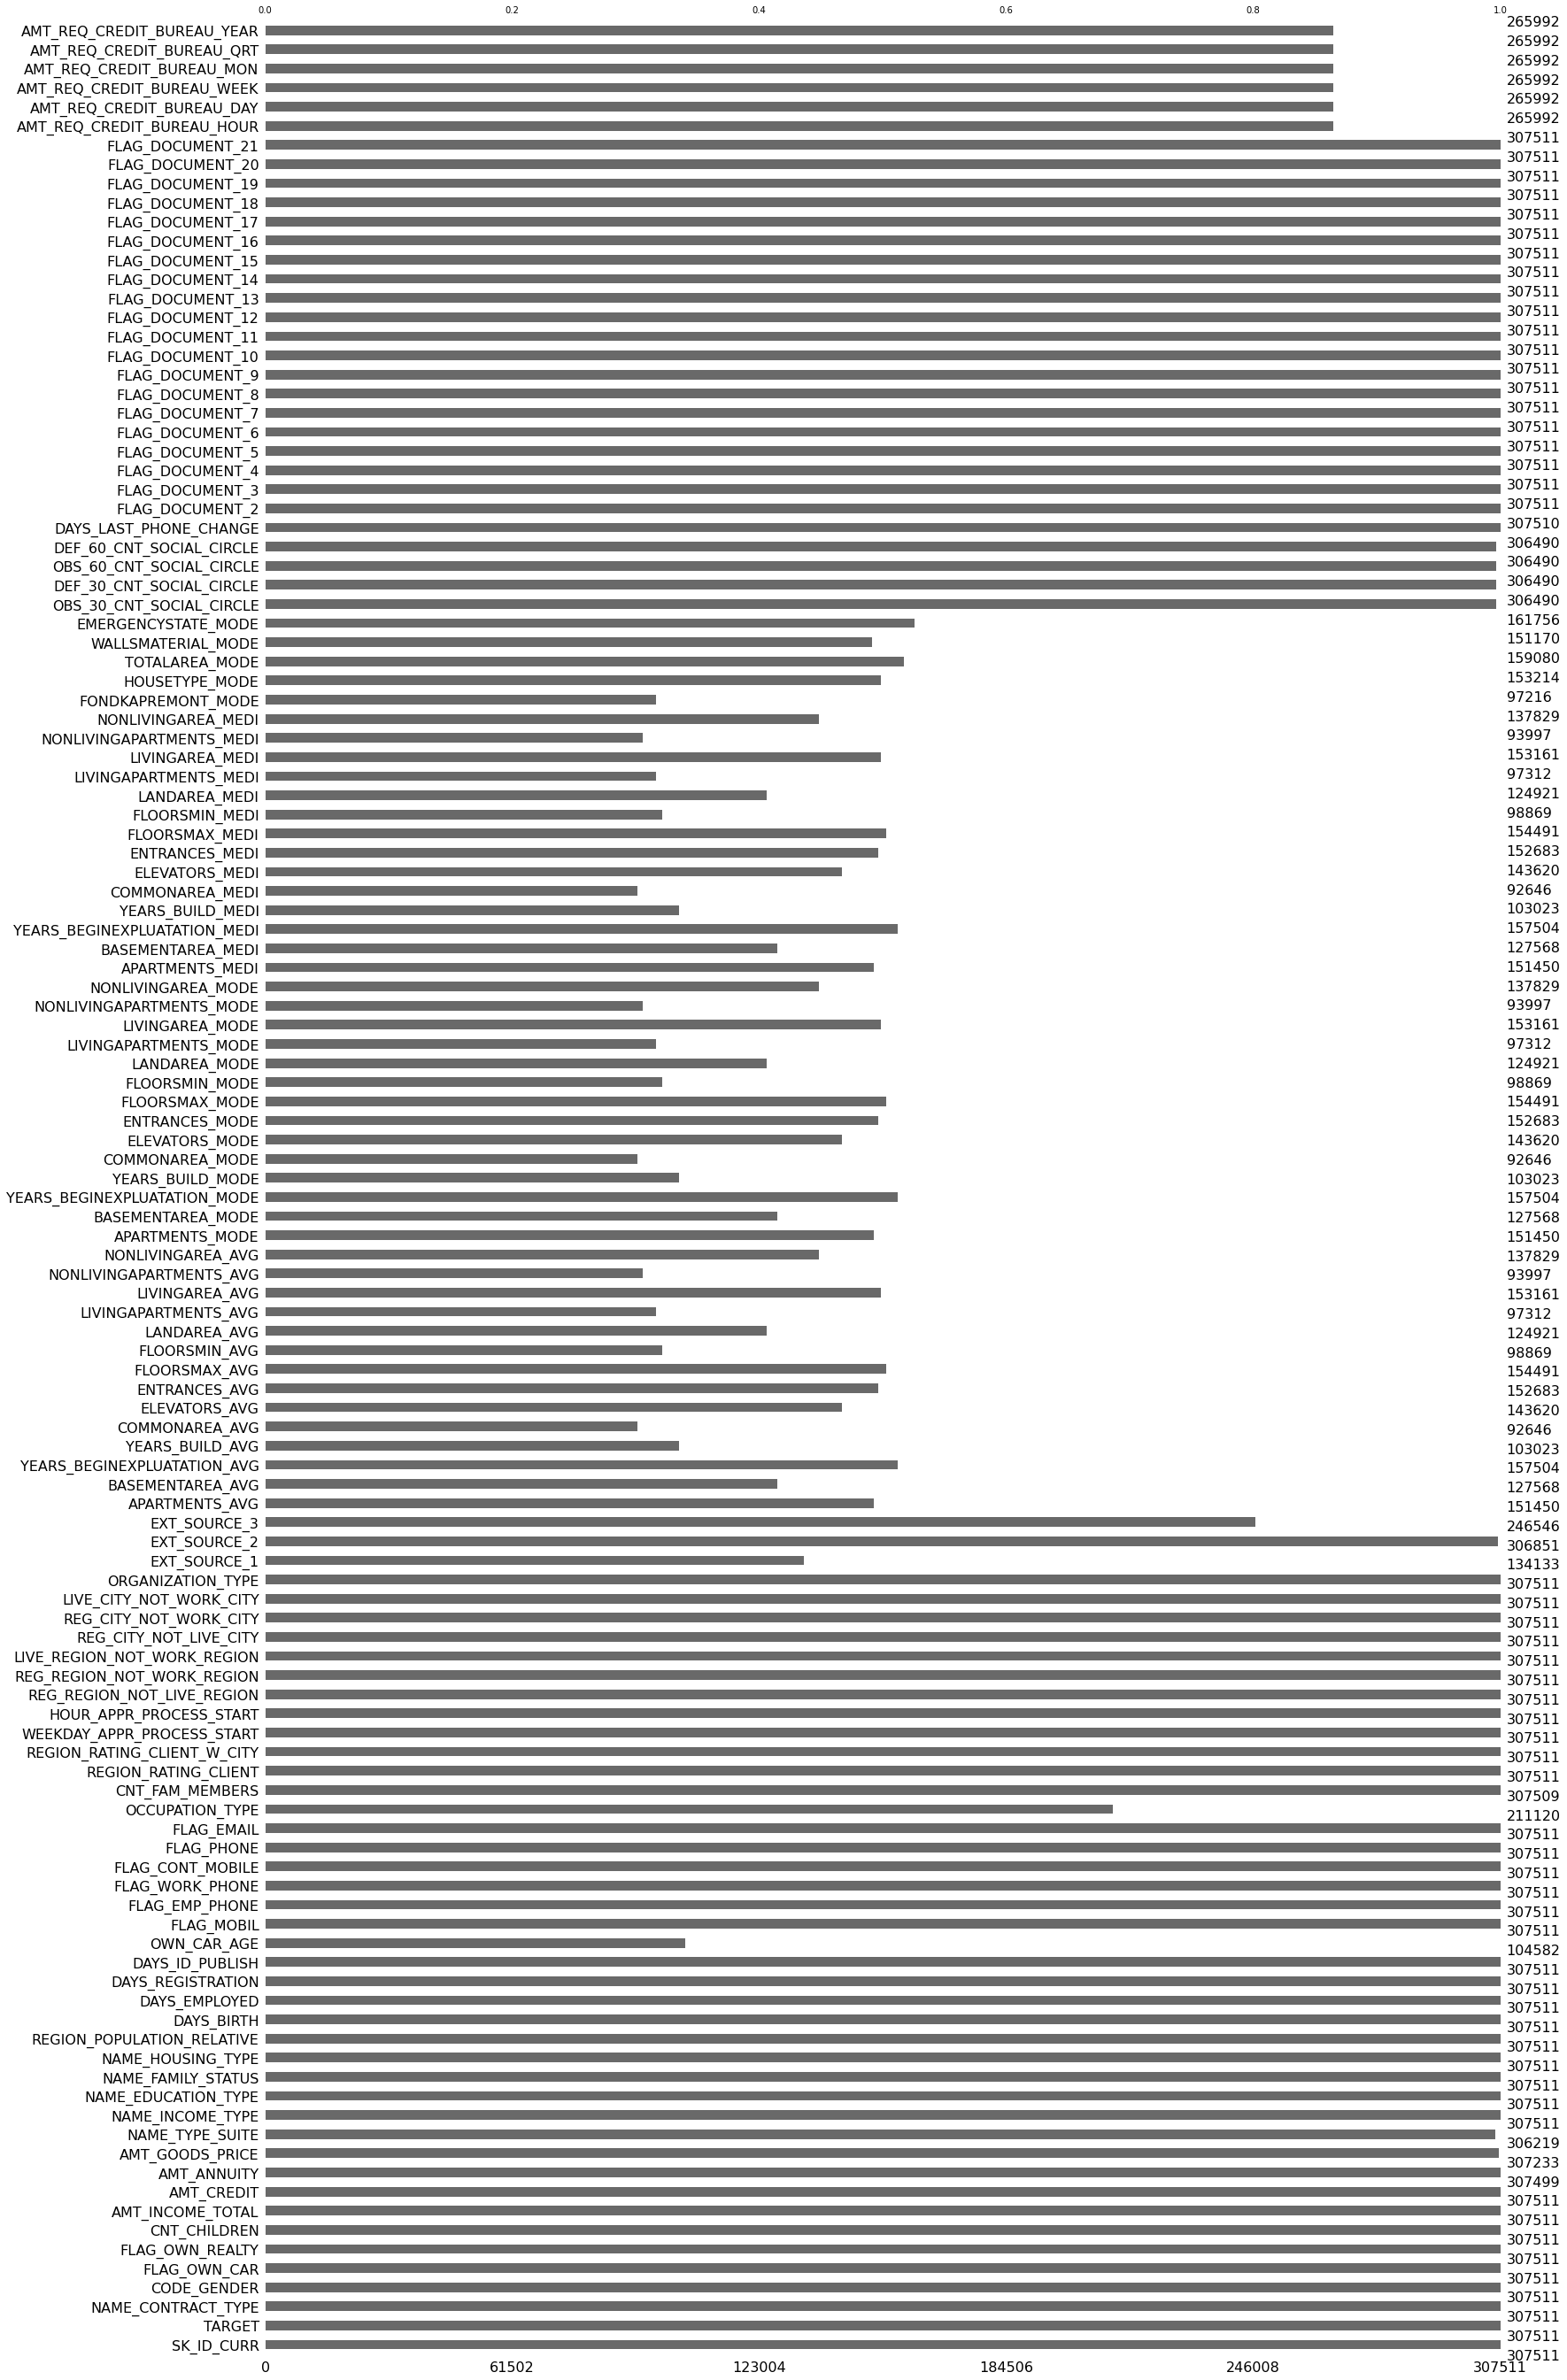

In [39]:
#Missing values
missing_data = data.isnull().sum()
total = data.count()
missing_ratio = total/len(data)

ratio = {'Total':total, 'missing_ratio' : missing_ratio}
print(pd.DataFrame(ratio))

print ("Mean of the missing ratio: " + str(ratio['missing_ratio'].mean()))

import missingno as msno
msno.bar(data)

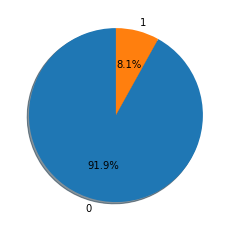

[0, 1]


In [33]:
# Draw a graph showing the percentage of classes
import matplotlib.pyplot as plt

count_samples = data.groupby('TARGET').count()

labels = data['TARGET'].value_counts().index.tolist()
sizes = count_samples.iloc[:,0].tolist()

plt.pie(sizes, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

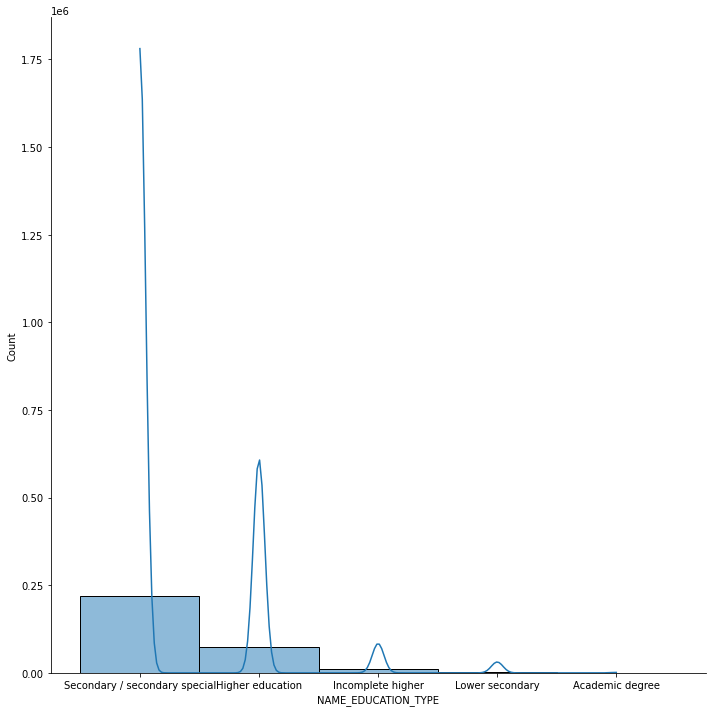

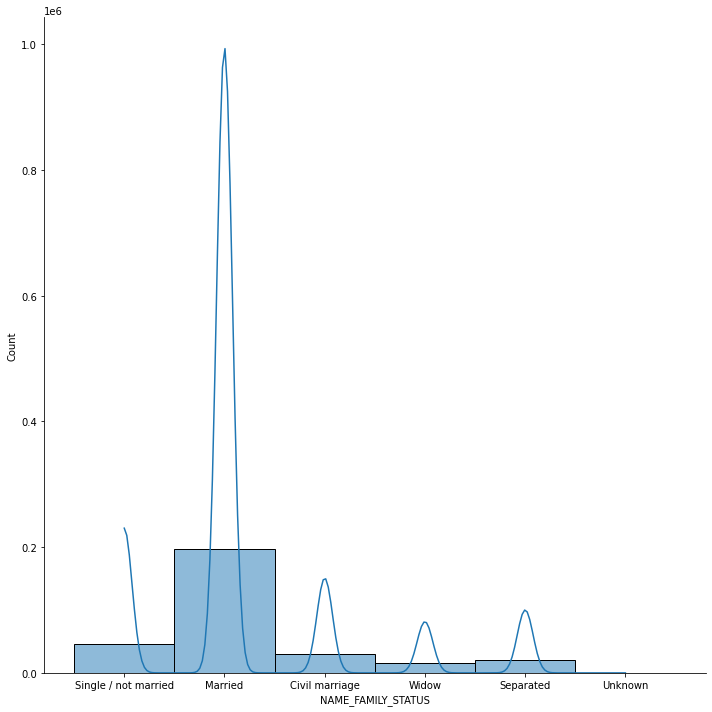

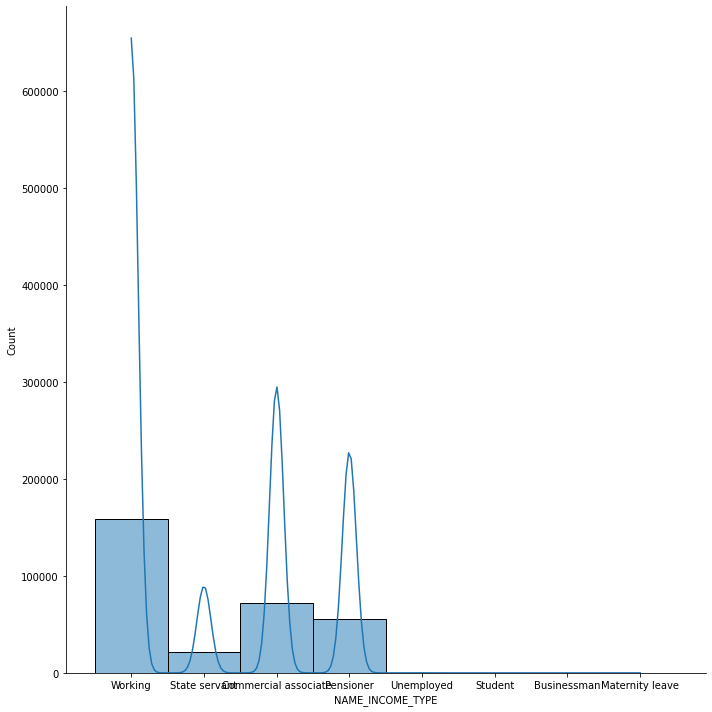

In [46]:
import seaborn as sns
sns.displot(data['NAME_EDUCATION_TYPE'], kde=True, height = 10)
sns.displot(data['NAME_FAMILY_STATUS'], kde=True, height = 10)
sns.displot(data['NAME_INCOME_TYPE'], kde=True, height = 10)

[Problem 3]
Issues

*   Unbalanced dataset
*   25% of data are missing values
*   Most of the applicants are:

  social status : Married

  education: Secondary

  income type: working

Questions
*   What features are important for trustable client?
*   How to deal with unbalanced dataset?

[Problem 4]

In [66]:
#Delete features (columns) that have half missing values.

print (data.shape)
for col in data.columns:
  if data[col].isnull().sum() > len(data)/2:
    data.drop(col, axis=1, inplace = True)

print(data.shape)
data.head()

(307511, 81)
(307511, 81)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


[Text(0.5, 1.0, 'Correlation')]

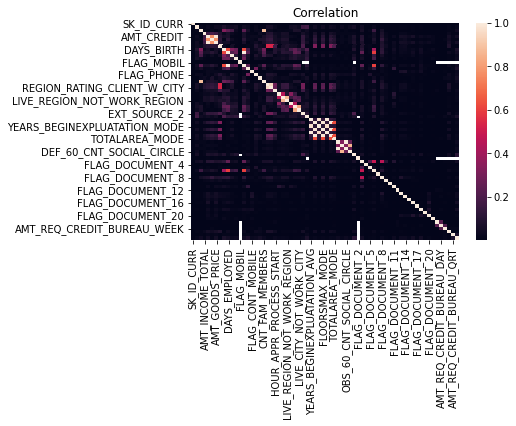

In [63]:
#What features are important for trustable client?
corr = data.corr(method = 'pearson').abs()
sns.heatmap(corr).set(title = 'Correlation')

SK_ID_CURR                    0.002108
TARGET                        1.000000
CNT_CHILDREN                  0.019187
AMT_INCOME_TOTAL              0.003982
AMT_CREDIT                    0.030369
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON     0.012462
AMT_REQ_CREDIT_BUREAU_QRT     0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
Name: TARGET, Length: 68, dtype: float64


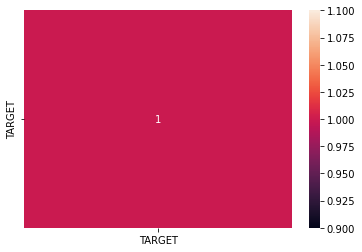

In [75]:
#features important for Target
# According to the result there are no features that has high correlation with TARGET
print (corr['TARGET'])
corr_high=corr.index[abs(corr['TARGET'])>0.5]
g = sns.heatmap(data[corr_high].corr(),annot=True)
plt.show()